#Sesión 4 - Diplomado Data Science Duoc UC

# Módulo: Machine Learning

A continuación, aprenderás a limpiar datos con el uso de las librerías de Python desde fuentes de datos que se encuentran en la web o que cargues localmente.

**Recuerda almacenar una copia de este Jupyter Notebook en tu Google Drive para poder ejecutar los bloques de código.**


---

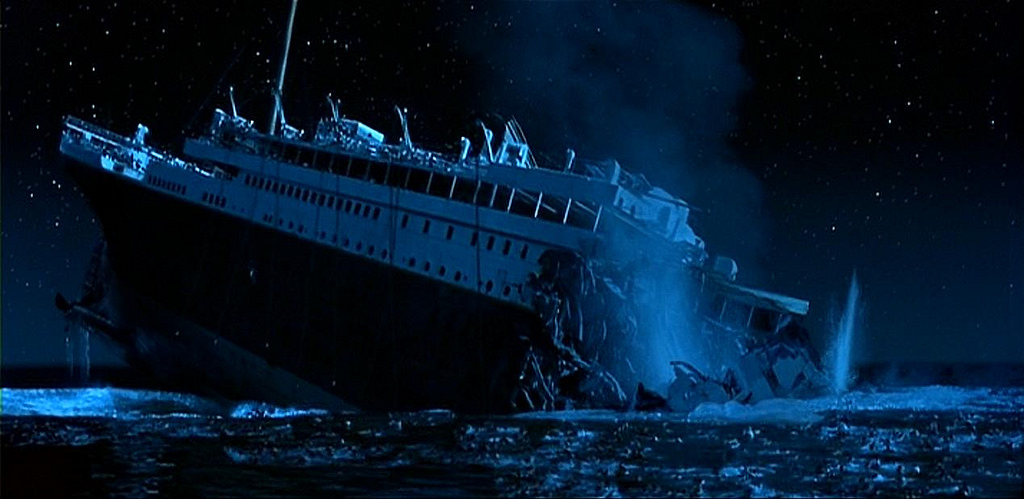

El hundimiento del RMS Titanic es uno de los naufragios más infames de la historia. El 15 de abril de 1912, durante su viaje inaugural, el Titanic se hundió después de chocar con un iceberg, matando a 1502 de los 2224 pasajeros y tripulación. Esta sensacional tragedia conmocionó a la comunidad internacional y dio lugar a mejores normas de seguridad para los buques.

Una de las razones por las que el naufragio provocó tantas pérdidas de vidas fue que no había suficientes botes salvavidas para los pasajeros y la tripulación. Aunque hubo algún elemento de suerte involucrado en sobrevivir al hundimiento, algunos grupos de personas tenían más probabilidades de sobrevivir que otros, como las mujeres, los niños y la clase alta.

En contexto: 

Survival : 0 = No, 1 = Si

Pclass : Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd

Sex : Sex Male or Female

Age : Age in years

Sibsp : number of siblings / spouses aboard the Titanic

Parch : number of parents / children aboard the Titanic

Ticket : Ticket number

Fare : Passenger fare

Cabin : Cabin number

Embarked : Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

Type : train or test

###Tipos de variables

* Survival : Corresponde a la clase del dataset. Es una variable de tipo Binaria dicotómica, ya que tenemos solo dos posibles valores (sobrevive o no sobrevive).

* Pclass : Clase del ticket de viaje. Es un tipo de variable categórica ordinal. 

* Sex : El género corresponde a una variable binaria.

* Age : La edad corresponde a una variable de tipo numérica discreta.

* Sibsp : Número de hermanos o cónyugues en el titanic. Variable de tipo numérica discreta.

* Parch : Número de padres e hijos en el titanic. Variable de tipo numérica discreta.

* Ticket : Ticket number. Identificador del registro, sin aporte al modelo final. 

* Name: Identificador del pasajero, sin aporte al modelo final. 

* Fare : Costo del ticket, corresponde a una variable de tipo contínua.

* Cabin : La cabina corresponde a una variable de tipo identificador, no es una variable útil para el modelo.  

* Embarked : Puerta de embarque C = Cherbourg, Q = Queenstown, S = Southampton. Corresponde a una variable de tipo categórica.


In [1]:
# Importacion de Pandas
import pandas as pd
import numpy as np
import seaborn as sns

#Recuerda que si ejecutas de forma local debes utilizar la siguiente sentencia
data = pd.read_csv('train.csv')

#Si el recurso lo tienes en drive, puedes montar tu google Drive y hacer referencia a la ruta del dataset en el siguiente código


In [2]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [3]:
#Conteo de los registros en cada columna
data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

En el dataset, se encuentran en general 891 registros por cada columna. En aquellos donde hay menos registros es porque tenemos algunos datos perdidos o datos nulls. Podemos identificarlos con esta función o bien con la que viene a continuación.

In [4]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Tenemos 177 datos perdidos en la edad de los pasajeros.

687 datos perdidos en el detalle de la Cabina.

2 datos perdidos en la identificaación de la puerta de embarque.


Antes de revisar qué métodos o técnicas se usarán para completar o trabajar los datos perdidos, debemos analizar qué datos nos podrían servir para determinar si una persona sobrevive o no sobrevive al titanic.

¿Será relevante el número del ticket para saber si sobrevive la persona o n
?

¿Será relevante el nombre del pasajero?

¿Tendrá que ver la clase del pasaje o la edad en la supervivencia?

Probablemente las variables de esta última pregunta si importe dentro del análisis, pero las primeras dos aseveraciones no influyen en la predicción.

In [6]:
#LOS TICKETS SON DISTINTOS (CASI TODOS) Y ENTONCES UN MODELO QUE LOS USE COMO VARIABLES EXPLICATIVAS NO SE PUEDE APLICAR 
#DESPUÉS EN DATOS TEST
data.Ticket.describe()
data.Ticket

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

In [7]:
missing_ages = data[data['Age'].isnull()]
# determina el promedio de las edades basado en Sex and Pclass
mean_ages = data.groupby(['Sex','Pclass'])['Age'].mean()

In [8]:
missing_ages.shape

(177, 12)

In [9]:
missing_ages.Age

5     NaN
17    NaN
19    NaN
26    NaN
28    NaN
       ..
859   NaN
863   NaN
868   NaN
878   NaN
888   NaN
Name: Age, Length: 177, dtype: float64

In [10]:
missing_ages.Name

5                              Moran, Mr. James
17                 Williams, Mr. Charles Eugene
19                      Masselmani, Mrs. Fatima
26                      Emir, Mr. Farred Chehab
28                O'Dwyer, Miss. Ellen "Nellie"
                         ...                   
859                            Razi, Mr. Raihed
863           Sage, Miss. Dorothy Edith "Dolly"
868                 van Melkebeke, Mr. Philemon
878                          Laleff, Mr. Kristo
888    Johnston, Miss. Catherine Helen "Carrie"
Name: Name, Length: 177, dtype: object

In [11]:
def suma3(valor):
    return valor+3 

In [12]:
suma3(7)

10

In [13]:
mean_ages

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [14]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [15]:
#missing_ages = data[data['Age'].isnull()]
# determina el promedio de las edades basado en Sex and Pclass#
mean_ages = data.groupby(['Sex','Pclass'])['Age'].mean()

def remove_na_ages(row):
    '''
    function to check if the age is null and replace wth the mean from 
    the mean ages dataframe 
    '''
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'],row['Pclass']]
    else:
        return row['Age']

data['Age'] = data.apply(remove_na_ages, axis=1)

Reemplazamos los valores perdidos con la función apply() las edades perdidas, con el promedio de la edad de hombres y de mujeres dependiendo de en qué clase viajaban. 

A continuación, modificaremos el "female" por "F" y el "male" por "M"

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [17]:
data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [18]:
df=data.replace(to_replace = "female", value = "F")

In [19]:
titanic = df.replace(to_replace = "male", value = "M")


In [20]:
#Imprimimos el dataset para ver como quedaron las variables Sex y Age.
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",M,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",F,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",M,35.00,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",M,27.00,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",F,19.00,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,21.75,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",M,26.00,0,0,111369,30.0000,C148,C


Como se puede ver a continuación, debemos ver como trabajar las columnas Cabin y Embarked, que tienen datos perdidos. 

Con respecto al puerto de embarque, los datos que extán son C = Cherburgo, Q = Queenstown, S = Southampton. Para los datos faltantes buscaremos alguna correlación en datos similares.


In [21]:
titanic.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

/Users/rodrigoassar/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


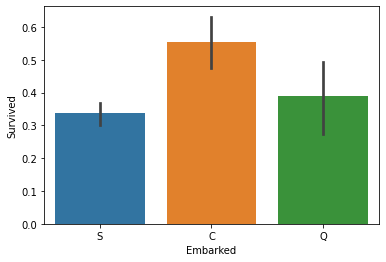

In [22]:
# 'Embarked' vs 'Survived'
sns.barplot(titanic['Embarked'], titanic['Survived']);

In [ ]:
# Count
print(titanic.groupby(['Embarked'])['PassengerId'].count())

# Compare with other variables
titanic.groupby(['Embarked']).mean()

Embarked
C    168
Q     77
S    646
Name: PassengerId, dtype: int64


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Embarked,,,,,,,
C,445.357143,0.553571,1.886905,30.461519,0.386905,0.363095,59.954144
Q,417.896104,0.389610,2.909091,25.690425,0.428571,0.168831,13.276030
S,449.517028,0.339009,2.346749,29.453890,0.569659,0.411765,27.243651


De lo anterior, se puede decir que los pasajeros C han pagado más y viajan en una clase mejor que las personas que se embarcan en Q y S. La cantidad de pasajeros de S es mayor que otros. Pero la probabilidad de supervivencia de C tiene más que otros.

Una de las opciones puede ser ver la variable predominante y reemplazar con la que más se repite (moda). Esta técnica es muy utilizada cuando tenemos variables categóricas. Cuando son numéricas como en el caso de la edad, es regular reemplazar con el promedio cuando no hay una mayor correlación entre los valores.

In [23]:
missing_embarked = titanic[titanic['Embarked'].isnull()]

In [24]:
missing_embarked

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",F,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",F,62.0,0,0,113572,80.0,B28,NaN


In [25]:
#una mejor imputación basada en encontrar la pción de Embarked que en sus promedios se parece más a la fila en que queremos imputar (completar) Embarked
#En este caso para ambos datos Embarked C es la que más se parece (mirar valores de age, fare y survived)
#titanic["Embarked"] = titanic["Embarked"].fillna("C")

In [26]:
# Fill Embarked nan values of dataset set with 'S' most frequent value
titanic["Embarked"] = titanic["Embarked"].fillna("S")

Ahora verificamos que ya no quedan más valores nulls en Embarked. 

In [27]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Nos queda la Cabina. Esta variable definitivamente no es muy significativa con la muerte del pasajero, además tiene muchos valores faltantes (casi un 77%). El campo no aporta mucho valor a la predicción.

In [28]:
titanic.Cabin

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

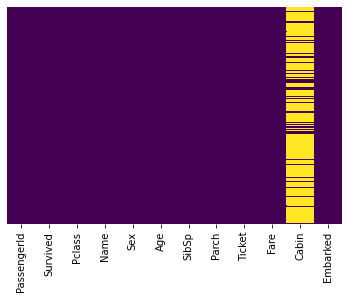

In [ ]:
sns.heatmap(titanic.isnull(), cbar = False , 
            yticklabels = False , cmap = 'viridis')

Le hacemos una exploración a los datos, para conocer los estadísticos correspondientes, rangos, desviación, promedio, cuartiles, etc.

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.318643,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.281103,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,21.750000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,26.507589,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,36.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

Quitaremos las variables que no nos son significativas para el modelo.

In [29]:
# Se eliminan las columnas que no aportan valor al modelo
titanic.drop(labels = ["Ticket",'Cabin','PassengerId'], axis = 1, 
             inplace = True)

In [30]:
titanic.shape

(891, 9)

Ahora hacemos una exploración de las distribuciones de cada variable

<AxesSubplot:xlabel='Pclass', ylabel='count'>

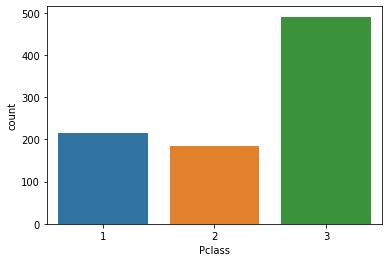

In [31]:
import matplotlib.pyplot as plt

sns.countplot(x ='Pclass',data=titanic)

La gráfica indica que había una mayor cantidad de gente en la tercera clase (alrededor de 500 pasajeros).

In [32]:
titanic["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='count'>

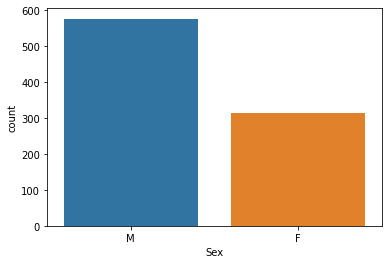

In [33]:
sns.countplot(x ='Sex',data=titanic)

La gráfica indica que iba una mayor cantidad de hombres que de mujeres en el Titanic.

<AxesSubplot:ylabel='Sex'>

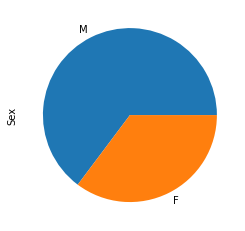

In [35]:
titanic['Sex'].value_counts().plot.pie()

In [34]:
#Lo confirmamos con números

titanic["Sex"].value_counts()

M    577
F    314
Name: Sex, dtype: int64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

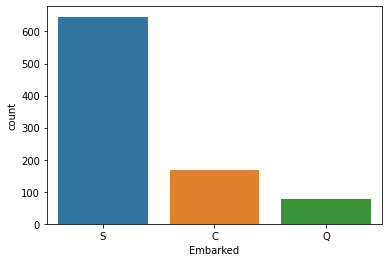

In [36]:
sns.countplot(x ='Embarked',data=titanic)

La mayor cantidad de gente fue embarcada en S que corresponde a Southampton

In [37]:
#Lo confirmamos con números

titanic["Embarked"].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

<AxesSubplot:ylabel='Embarked'>

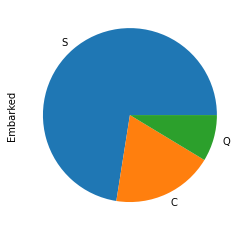

In [38]:
titanic['Embarked'].value_counts().plot.pie()

In [39]:
titanic.Age.describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64

In [40]:
#Revisamos el detalle estadístico de los diferentes embarques con la edad.
titanic.groupby(by='Embarked')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Embarked,,,,,,,,
C,168.0,30.461519,13.918036,0.42,22.00,27.000000,39.000000,71.0
Q,77.0,25.690425,10.431269,2.00,21.75,26.507589,26.507589,70.5
S,646.0,29.453890,13.359701,0.67,21.75,27.000000,36.875000,80.0


In [41]:
titanic.groupby(by='Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,314.0,27.288063,13.091327,0.75,21.0,24.0,35.0,63.0
M,577.0,30.423672,13.264336,0.42,23.0,27.0,37.0,80.0


In [42]:
titanic.groupby(['Sex','Embarked'])['Age'].describe()

count       mean        std    min        25%        50%  \
Sex Embarked                                                             
F   C          73.0  28.141217  14.634877   0.75  18.000000  24.000000   
    Q          36.0  22.790916   4.832527  15.00  21.750000  21.750000   
    S         205.0  27.774000  13.389877   1.00  21.000000  27.000000   
M   C          95.0  32.244488  13.141579   0.42  26.000000  28.000000   
    Q          41.0  28.236335  13.118586   2.00  26.507589  26.507589   
    S         441.0  30.234791  13.288605   0.67  22.000000  28.000000   

                    75%   max  
Sex Embarked                   
F   C         38.000000  60.0  
    Q         21.750000  39.0  
    S         35.000000  63.0  
M   C         40.000000  71.0  
    Q         26.507589  70.5  
    S         38.000000  80.0

En el embarque C habían 168 pasajeros, de los cuales la edad máxima era 71 años, con respecto a la mínima se infiere que habían menores que no alcanzaban a tener un año de edad, de ahí el min 0,42 y 0,67 de los embarques C y S respectivamente. La edad máxima del embarque S es de 80 años, donde abordaron 686 personas. En el embarque Q abordaron menos personas, solo 77 y la edad mínima fue de 2 años y la máxima de 70,5 años.

/Users/rodrigoassar/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


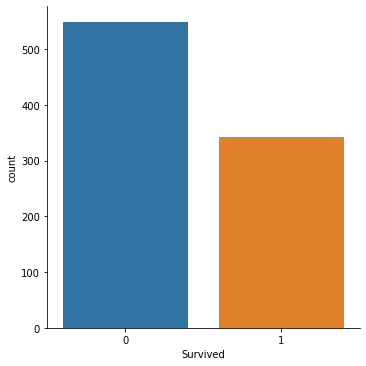

In [43]:
sns.factorplot(x='Survived',data=titanic,kind = 'count')

In [45]:
titanic.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [48]:
titanic.groupby(['Sex','Embarked','Pclass'])['Survived'].describe()

count      mean       std  min  25%  50%  75%  max
Sex Embarked Pclass                                                    
F   C        1        43.0  0.976744  0.152499  0.0  1.0  1.0  1.0  1.0
             2         7.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
             3        23.0  0.652174  0.486985  0.0  0.0  1.0  1.0  1.0
    Q        1         1.0  1.000000       NaN  1.0  1.0  1.0  1.0  1.0
             2         2.0  1.000000  0.000000  1.0  1.0  1.0  1.0  1.0
             3        33.0  0.727273  0.452267  0.0  0.0  1.0  1.0  1.0
    S        1        50.0  0.960000  0.197949  0.0  1.0  1.0  1.0  1.0
             2        67.0  0.910448  0.287694  0.0  1.0  1.0  1.0  1.0
             3        88.0  0.375000  0.486897  0.0  0.0  0.0  1.0  1.0
M   C        1        42.0  0.404762  0.496796  0.0  0.0  0.0  1.0  1.0
             2        10.0  0.200000  0.421637  0.0  0.0  0.0  0.0  1.0
             3        43.0  0.232558  0.427463  0.0  0.0  0.0  0.0  1.0
    Q        1         1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
             2         1.0  0.000000       NaN  0.0  0.0  0.0  0.0  0.0
             3        39.0  0.076923  0.269953  0.0  0.0  0.0  0.0  1.0
    S        1        79.0  0.354430  0.481397  0.0  0.0  0.0  1.0  1.0
             2        97.0  0.154639  0.363439  0.0  0.0  0.0  0.0  1.0
             3       265.0  0.128302  0.335058  0.0  0.0  0.0  0.0  1.0

Con respecto a los supervivientes, en cantidad fueron menos que la gente que no sobrevivió a la tragedia del titanic. 

Es decir, murió más gente que la que se salvó.

/Users/rodrigoassar/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


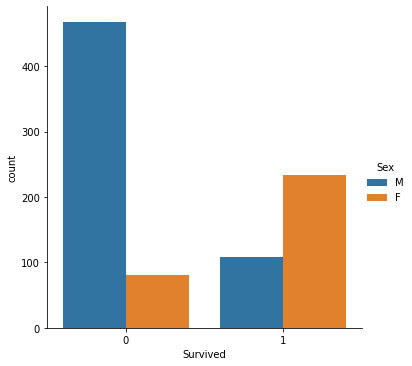

In [49]:
sns.factorplot(x='Survived',data = titanic , kind = 'count', hue = 'Sex')

Del siguiente gráfico, se puede inferir que de la gente que no sobrevivió, en su mayoría fueron hombres. Esto tiene mucho sentido si lo relacionamos con la frase clásica de la película "Mujeres y niños primero" cuando se dirigían a los botes salvavidas.

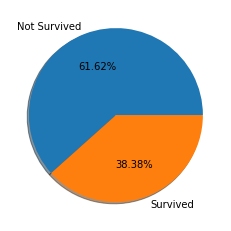

In [55]:
sizes = titanic['Survived'].value_counts()
fig , ax = plt.subplots()
ax.pie(sizes,labels = ['Not Survived','Survived'],autopct='%1.2f%%',shadow = True)
plt.show()

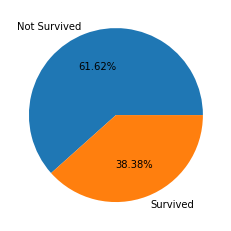

In [56]:
sizes = titanic['Survived'].value_counts()
fig , ax = plt.subplots()
ax.pie(sizes,labels = ['Not Survived','Survived'],autopct='%1.2f%%',shadow = False)
plt.show()

El grtáfico circular nos refleja que un 61,62% de los pasajeros no sobrevivió a la tragedia, y que solo se salvó un 38,38% de los pasajeros.

<AxesSubplot:>

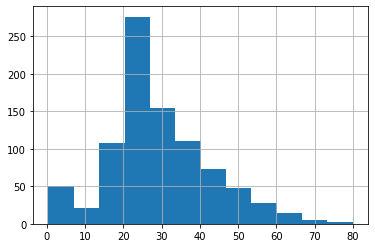

In [58]:
titanic['Age'].hist(bins=12)

En este histograma, se arroja información relevante a las edades que predominaban en la flota del titanic. La mayor parte de los pasajeros correspondía a jóvenes de entre 20 y 30 años de edad. El tramo de edad que tenía menor cantidad de pasajeros era entre 70 y 80 años. 

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

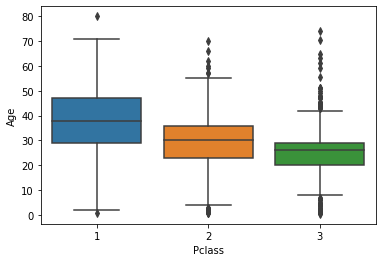

In [59]:
sns.boxplot(x='Pclass',y='Age',data=titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

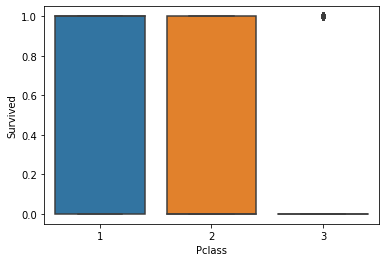

In [60]:
sns.boxplot(x='Pclass',y='Survived',data=titanic)

Del último, podemos ver que tanta dispersión hay entre las edades en las diferentes clases de los tickets. Donde hay mayor variedad de datos es en la clase 3 donde hay mayor cantidad de gente de acuerdo a lo que se revisó más arriba. Mientras que en la primera clase los datos de edad están mucho más compactos en el rango 24 y 48 años aprox.

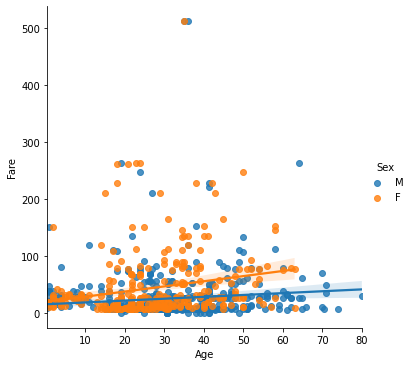

In [63]:
from seaborn import lmplot
lmplot(x="Age", y="Fare", hue="Sex", data=titanic)

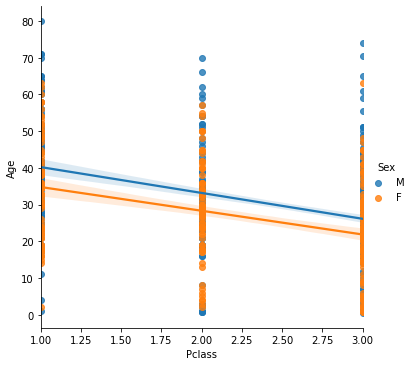

In [64]:
lmplot(x="Pclass", y="Age", hue="Sex", data=titanic)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

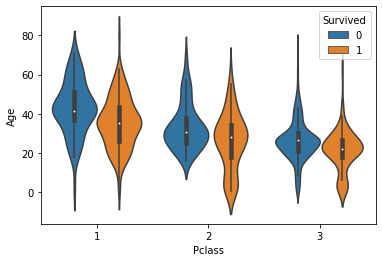

In [66]:
from seaborn import violinplot
violinplot(x="Pclass", y="Age", hue="Survived", data=titanic)

<AxesSubplot:xlabel='Age', ylabel='Density'>

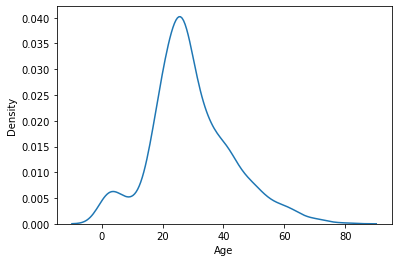

In [67]:
from seaborn import kdeplot 
kdeplot(titanic.Age)

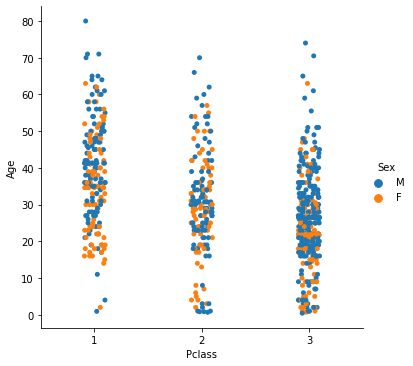

In [69]:
sns.catplot(x='Pclass', y='Age', hue='Sex',data=titanic)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

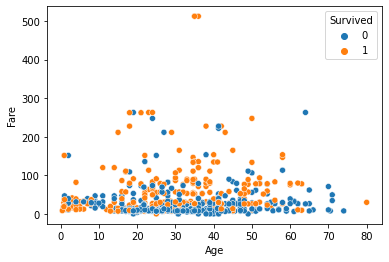

In [71]:
sns.scatterplot(data=titanic, x="Age", y="Fare", hue="Survived")

In [61]:
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",M,22.00,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",F,38.00,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",F,26.00,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",F,35.00,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",M,35.00,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",M,27.00,0,0,13.0000,S
887,1,1,"Graham, Miss. Margaret Edith",F,19.00,0,0,30.0000,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",F,21.75,1,2,23.4500,S
889,1,1,"Behr, Mr. Karl Howell",M,26.00,0,0,30.0000,C


### Conclusiones finales

Como vemos, un análisis exploratorio nos ayuda a entender mucho del contexto de los datos. Nos da respuesta a muchas interrogantes y nos ayuda a descifrar y validad hipótesis que podrían haberse planteado respecto a los datos y su comportamiento. 

Un bonus que nos servirá mucho para el análisis exploratorio es la Matriz de Correlación, te queda como desafío para poder revisarla en la siguiente unidad de aprendizaje. 

Puede ser útil en la entrega de tu primer trabajo.